In [1]:
%load_ext autoreload


In [2]:
import sys
sys.path.append('../')
%autoreload 2
# %matplotlib widget
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from src import image
import json
import requests

In [11]:
logo = image.Image.from_file('LogoColor_Audley.png', 'MainLogo', color_model='unchanged')
logo_nd = logo.image
logo_mask = logo_nd[:,:,3]  # Create transparency mask
logo_mask = image.Image(logo_mask, 'Logo Mask')
logo_mask.resize(new_w=138)
logo_mask.im_show()
logo_mask_nd = logo_mask.image
logo_mask_nd[logo_mask_nd > 0] = 1

sys.path.append('../productimages')
prod_image_path = '../productimages/tradepackage/hoodie/front/gildan_18500_black_front.png'
prod_image = image.Image.from_file(prod_image_path, 'Product Image Blank', color_model='unchanged')
prod_image.im_show()
prod_image_nd = prod_image.image


logo_loc = (370,584)
full_mask_nd = np.zeros( (prod_image.image.shape[0], prod_image.image.shape[1]) )
full_mask_nd[ logo_loc[0]:logo_loc[0]+logo_mask_nd.shape[0], logo_loc[1]:logo_loc[1]+logo_mask_nd.shape[1] ] += logo_mask_nd

full_mask = image.Image(full_mask_nd, 'Full Mask Image')
full_mask.image[full_mask.image>0] = 255
full_mask.im_show()

prod_image_nd[full_mask_nd > 0] = [0,0,0,0]
prod_image_masked = image.Image(prod_image_nd, 'Masked Image')
prod_image_masked.print_info()
prod_image_masked.color_space = 'BGRA'
prod_image_masked.print_info()
prod_image_masked.cvt_color(color='rgba')
prod_image_masked.im_show()

color_logo = image.Image.from_file('LogoColor_Audley.png', 'Color Logo', color_model='unchanged')
color_logo.im_show()
# color_logo.cvt_color(color='RGBA')
color_logo.resize(new_w=138)
color_logo.image[color_logo.image[:,:,3]<130] = [0,0,0,0]
prod_image_nd[ logo_loc[0]:logo_loc[0]+logo_mask_nd.shape[0], logo_loc[1]:logo_loc[1]+logo_mask_nd.shape[1] ] += color_logo.image

color_mockup = image.Image(prod_image_nd, 'Colored Mockup')
color_mockup.color_space = 'BGRA'
color_mockup.cvt_color(color='rgba')
color_mockup.im_show()

color_mockup_output = image.Image(color_mockup.image, 'Color Mockup Output')
cv2.imwrite('outputImage.png', color_mockup_output.image) 






Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

----------------------
---- Masked Image ----
----------------------
Height            : 1250
Width             : 1000
Color Channels    : 4
Color Space       : RGBA

----------------------
---- Masked Image ----
----------------------
Height            : 1250
Width             : 1000
Color Channels    : 4
Color Space       : BGRA



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

True

In [12]:
with open('trades.json') as f:
    data = json.load(f)
print(data)
print(data['tshirts'][0]['filePath'])

{'tshirts': [{'filePath': '../productimages/tradepackage/tshirt/front/jerzees_29mr_black_front.png', 'position': [287, 547], 'width': 135}, {'filePath': '../productimages/tradepackage/tshirt/front/jerzees_29mr_black_front.png', 'position': [264, 324], 'width': 345}, {'filepath': '../productimages/tradepackage/tshirt/back/jerzees_29mr_black_back.png', 'position': [204, 304], 'width': 385}]}
../productimages/tradepackage/tshirt/front/jerzees_29mr_black_front.png


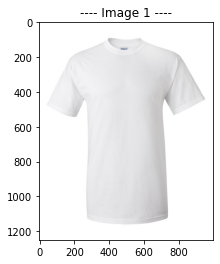

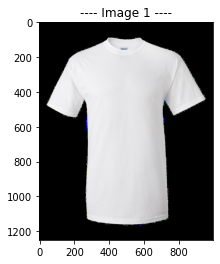

In [3]:
username = '493639'
password = 'ade20a10-7d2d-4003-a296-e8d4939a70c5'
response = requests.get("https://api.ssactivewear.com/v2/products/B00760003?fields=Sku,Gtin,Qty,CustomerPrice", auth=(username, password))
response2 = requests.get("https://api.ssactivewear.com/v2/styles?search=Gildan 5000", auth=(username, password))

response3 = requests.get("https://api.ssactivewear.com/v2/products/?style=00760,Gildan 5000", auth=(username, password))

response4 = requests.get("https://api.ssactivewear.com/v2/products/?style=06535", auth=(username, password))

# response5 = requests.get("https://www.ssactivewear.com/Images/Color/17130_f_fm.jpg")
img_data = requests.get("https://www.ssactivewear.com/Images/Color/17130_f_fl.jpg").content
# with open('image_name.jpg', 'wb') as handler:
#     handler.write(img_data)
img_data = cv2.imdecode(np.asarray(bytearray(img_data)), cv2.IMREAD_COLOR)
aqua = image.Image(img_data, 'Image 1')
aqua.im_show()
plt.show()

aqua.image[aqua.image > 253] = 0
aqua.im_show()


In [20]:
# Begin SS Activewear API Scall
username = '493639'
password = 'ade20a10-7d2d-4003-a296-e8d4939a70c5'


data = requests.get( 'https://api.ssactivewear.com/v2/styles/gildan 5000', auth=(username, password))
print(data.content)

b'[\r\n  {\r\n    "styleID": 16,\r\n    "partNumber": "00060",\r\n    "brandName": "Gildan",\r\n    "styleName": "5000",\r\n    "uniqueStyleName": "5000",\r\n    "title": "Heavy Cotton\xe2\x84\xa2 T-Shirt",\r\n    "description": "<ul><li>5.3 oz.(US) 8.8 oz.(CA), 100% preshrunk cotton</li><li>Heather colors, Graphite Heather, Safety colors,Tweed, Blackberry, Lilac, Midnight, Neon colors &amp; Sunset:&nbsp;50/50 cotton/polyester</li><li>Antique colors &amp; Sport Grey :&nbsp;90/10&nbsp;cotton/polyester</li><li>Ash Grey: 99/1 cotton/polyester</li><li>Classic fit</li><li>Seamless double needle 7/8&quot; collar</li><li>Taped neck and shoulders</li><li>Double needle sleeve and bottom hems</li><li>Quarter-turned to eliminate center crease</li><li>Safety Green: Compliant with ANSI / ISEA 107</li><li>Tear away label</li></ul>",\r\n    "baseCategory": "T-Shirts",\r\n    "categories": "8,21,40,57,71,72,79,87,90,97,115,148,158,159,180,184,234,269,304,329,340,341",\r\n    "catalogPageNumber": "260"